# **First Project - Sentiment Analysis**

 By Muhammad Suhaili


# **Dataset Scrapping**

In this project, the dataset that will be scrapped comes from wuthering waves game in google playstore. I choose this app because the game has experienced minor to major issues since its launch until today so the reviews might provide a wide and rather evenly distribution for negative, neutral, and positive reviews, thus suitable for sentiment analysis to determine what the player a.k.a the reviewers think about the game. Dataset will be taken by the _'newest'_ filter and not with _'most relevant'_ in regards to what the game has done since launch to keep improving by providing neede periodic continuous updates to address and fix the issues. Therefore, hopefully the reviews taken by this scraping will encompass what players feel after those improvement attempts by the developer.

First and foremost, we need to install the required libraries using the command below

- pip install google-play-scraper workcloud textblob nltk pandas numpy scikit-learn tensorflow matplotlib seaborn transformers scipy nltk keras

Further information could be looked up in requirements.txt file


In [1]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [2]:
import torch
print(torch.__version__) #current version
print(torch.cuda.is_available()) #check if GPU is available

2.3.1
True


In [3]:
import keras
keras.__version__

'3.4.1'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from web_scraping import fetch_reviews

app_id = 'com.kurogame.wutheringwaves.global'
reviews_count = 40000

reviews_data = fetch_reviews(app_id, reviews_count)

 74%|███████▎  | 29449/40000 [01:12<00:26, 405.34it/s]


In [6]:
df = pd.DataFrame(reviews_data)
df.head()

reviewId                    userName  \
0  c34f9525-8e6e-4b4e-8101-992da75ffff1                       Aonxu   
1  76a65bb3-5145-457e-a394-49ce0e6abed6              Rein escaflown   
2  a30d9fbe-7560-41af-8e97-23bffc747e40                  Lost Phone   
3  642c7436-249a-4387-89ee-56a32ecdd905  Princess Nagisa Ichinomiya   
4  c9f9ac02-d923-47c7-960c-a4a07156d4b3                           T   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0              No xbox ver made me hate the game ngl      1              0   
1  I can play this game fine in my Blackshark 2. ...      5              0   
2                             Just a literal W game.      5              0   
3  I so really really really really love this gam...      5              0   
4                      just another gacha money grab      1              0   

  reviewCreatedVersion                  at replyContent repliedAt appVersion  
0                 None 2024-07-24 10:42:19         None       NaT       None  
1                 None 2024-07-24 10:37:51         None       NaT       None  
2                1.1.0 2024-07-24 10:27:58         None       NaT      1.1.0  
3                1.1.0 2024-07-24 10:27:19         None       NaT      1.1.0  
4                 None 2024-07-24 10:15:14         None       NaT       None

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29449 entries, 0 to 29448
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              29449 non-null  object        
 1   userName              29449 non-null  object        
 2   userImage             29449 non-null  object        
 3   content               29447 non-null  object        
 4   score                 29449 non-null  int64         
 5   thumbsUpCount         29449 non-null  int64         
 6   reviewCreatedVersion  21906 non-null  object        
 7   at                    29449 non-null  datetime64[ns]
 8   replyContent          1383 non-null   object        
 9   repliedAt             1383 non-null   datetime64[ns]
 10  appVersion            21906 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.5+ MB


In [8]:
# Pick up only the important columns
df_new = df[['reviewId', 'userName', 'content', 'score',
         'thumbsUpCount', 'reviewCreatedVersion', 'at', 'appVersion']]

In [9]:
value_counts = df_new['score'].value_counts().sort_index(ascending=False)
value_counts

score
5    15398
4     3312
3     2905
2     2149
1     5685
Name: count, dtype: int64

Now that we know the score reviews are not focused biased and properly distributed, we can save the dataset that we have been scraped to a csv file and open the file.

In [10]:
df_new.to_csv('wutheringwaves.csv', index=False, header=True, encoding='utf-8')
ww_df = pd.read_csv('wutheringwaves.csv')
ww_df

reviewId                    userName  \
0      c34f9525-8e6e-4b4e-8101-992da75ffff1                       Aonxu   
1      76a65bb3-5145-457e-a394-49ce0e6abed6              Rein escaflown   
2      a30d9fbe-7560-41af-8e97-23bffc747e40                  Lost Phone   
3      642c7436-249a-4387-89ee-56a32ecdd905  Princess Nagisa Ichinomiya   
4      c9f9ac02-d923-47c7-960c-a4a07156d4b3                           T   
...                                     ...                         ...   
29444  2ab9b2f0-5ab4-4a8b-bc77-48bdbebc0e78           Karl Ian Galarido   
29445  a2a774c8-1205-4415-a864-0befcddf6918                    Abj Nada   
29446  a0adeb2e-aeb3-42f4-a9ac-7b8131f973c3                        Gojo   
29447  f888af0d-292f-4038-a8ad-59627e98977a              Muhammad Azfar   
29448  f70e2bac-eabb-4f9c-95e6-7232b07bd8af             Biswajit Ghanti   

                                                 content  score  \
0                  No xbox ver made me hate the game ngl      1   
1      I can play this game fine in my Blackshark 2. ...      5   
2                                 Just a literal W game.      5   
3      I so really really really really love this gam...      5   
4                          just another gacha money grab      1   
...                                                  ...    ...   
29444  "Wuthering Games is an absolute masterpiece! T...      5   
29445       BEST GAME STYLE EVER, GENSHIN COULD NEVER !!      5   
29446                              One of the games ever      5   
29447                                             first?      5   
29448                      Best open world game ever....      5   

       thumbsUpCount reviewCreatedVersion                   at appVersion  
0                  0                  NaN  2024-07-24 10:42:19        NaN  
1                  0                  NaN  2024-07-24 10:37:51        NaN  
2                  0                1.1.0  2024-07-24 10:27:58      1.1.0  
3                  0                1.1.0  2024-07-24 10:27:19      1.1.0  
4                  0                  NaN  2024-07-24 10:15:14        NaN  
...              ...                  ...                  ...        ...  
29444            251                1.0.0  2024-05-21 11:19:43      1.0.0  
29445             42                1.0.0  2024-05-21 11:19:03      1.0.0  
29446              1                  NaN  2024-05-21 11:17:30        NaN  
29447              1                  NaN  2024-05-21 11:17:19        NaN  
29448              6                  NaN  2024-05-21 11:12:36        NaN  

[29449 rows x 8 columns]

# **Data Cleaning**

In [11]:
# Check for the number of duplicated rows
duplicated_rows = ww_df.duplicated()
num_duplicated_rows = duplicated_rows.sum()

print("Number of duplicated rows:", num_duplicated_rows)

Number of duplicated rows: 0


In [12]:
# Check if there are any missing values
nan_df = ww_df.isna()
print(nan_df.sum())

reviewId                   0
userName                   0
content                    2
score                      0
thumbsUpCount              0
reviewCreatedVersion    7543
at                         0
appVersion              7543
dtype: int64


In [13]:
# Drop rows with missing values
ww_df = ww_df.dropna()
ww_df

reviewId                       userName  \
2      a30d9fbe-7560-41af-8e97-23bffc747e40                     Lost Phone   
3      642c7436-249a-4387-89ee-56a32ecdd905     Princess Nagisa Ichinomiya   
5      2a2894d6-e61e-4dba-86c4-56fbd2694051                          estel   
10     d2ea052f-6540-4517-baec-46bdd978cc80                Miracle Visible   
11     3d113137-3f6b-41f0-a246-9a2c0aab0718                    Evrim Elfin   
...                                     ...                            ...   
29419  9cb5f118-2596-4793-a1e6-1e8663e26d5c                        黒魔やシャルル   
29431  2876b15b-b182-4154-835c-973b723553d3                    Ryle Kenshi   
29443  e0ebfefb-81d4-46c2-8e2d-4b12907f9a90  Enrique Iligan III (Enriiiqx)   
29444  2ab9b2f0-5ab4-4a8b-bc77-48bdbebc0e78              Karl Ian Galarido   
29445  a2a774c8-1205-4415-a864-0befcddf6918                       Abj Nada   

                                                 content  score  \
2                                 Just a literal W game.      5   
3      I so really really really really love this gam...      5   
5      muito bom, os gráficos melhoraram bastante, po...      5   
10                                   Better then Genshin      5   
11     Game has incredibly Bad optimization after you...      1   
...                                                  ...    ...   
29419                                    lets go kuro!!!      5   
29431      Hey where is the server? Gimme 5 star please.      5   
29443                                               yeyy      5   
29444  "Wuthering Games is an absolute masterpiece! T...      5   
29445       BEST GAME STYLE EVER, GENSHIN COULD NEVER !!      5   

       thumbsUpCount reviewCreatedVersion                   at appVersion  
2                  0                1.1.0  2024-07-24 10:27:58      1.1.0  
3                  0                1.1.0  2024-07-24 10:27:19      1.1.0  
5                  0                1.0.0  2024-07-24 10:11:26      1.0.0  
10                 0                1.1.0  2024-07-24 09:17:48      1.1.0  
11                 0                1.1.0  2024-07-24 09:01:38      1.1.0  
...              ...                  ...                  ...        ...  
29419              1                1.0.0  2024-05-21 11:39:29      1.0.0  
29431              2                1.0.0  2024-05-21 11:37:04      1.0.0  
29443              8                1.0.0  2024-05-21 11:20:09      1.0.0  
29444            251                1.0.0  2024-05-21 11:19:43      1.0.0  
29445             42                1.0.0  2024-05-21 11:19:03      1.0.0  

[21906 rows x 8 columns]

## **Text Preprocessing**

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Emoji pattern
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"  # dingbats
    u"\U000024C2-\U0001F251" 
    "]+", flags=re.UNICODE)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def data_cleaning(sent):
    texts = sent.lower()
    texts = re.sub(emoji_pattern, '', texts)  # Remove emojis
    texts = re.sub(r'http\S+', '', texts)  # Remove URLs
    texts = re.sub(r'@[A-Za-z0-9]+', '', texts)  # Remove user mentions
    texts = re.sub(r'#[A-Za-z0-9]+', '', texts)  # Remove hashtags
    texts = re.sub(r'[^a-z\s]', '', texts)  # Remove non-alphabetic characters
    words = word_tokenize(texts)
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

ww_df['cleaned_review'] = ww_df['content'].apply(data_cleaning)
ww_df

C:\Users\User\AppData\Local\Temp\ipykernel_18340\590847148.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ww_df['cleaned_review'] = ww_df['content'].apply(data_cleaning)


reviewId                       userName  \
2      a30d9fbe-7560-41af-8e97-23bffc747e40                     Lost Phone   
3      642c7436-249a-4387-89ee-56a32ecdd905     Princess Nagisa Ichinomiya   
5      2a2894d6-e61e-4dba-86c4-56fbd2694051                          estel   
10     d2ea052f-6540-4517-baec-46bdd978cc80                Miracle Visible   
11     3d113137-3f6b-41f0-a246-9a2c0aab0718                    Evrim Elfin   
...                                     ...                            ...   
29419  9cb5f118-2596-4793-a1e6-1e8663e26d5c                        黒魔やシャルル   
29431  2876b15b-b182-4154-835c-973b723553d3                    Ryle Kenshi   
29443  e0ebfefb-81d4-46c2-8e2d-4b12907f9a90  Enrique Iligan III (Enriiiqx)   
29444  2ab9b2f0-5ab4-4a8b-bc77-48bdbebc0e78              Karl Ian Galarido   
29445  a2a774c8-1205-4415-a864-0befcddf6918                       Abj Nada   

                                                 content  score  \
2                                 Just a literal W game.      5   
3      I so really really really really love this gam...      5   
5      muito bom, os gráficos melhoraram bastante, po...      5   
10                                   Better then Genshin      5   
11     Game has incredibly Bad optimization after you...      1   
...                                                  ...    ...   
29419                                    lets go kuro!!!      5   
29431      Hey where is the server? Gimme 5 star please.      5   
29443                                               yeyy      5   
29444  "Wuthering Games is an absolute masterpiece! T...      5   
29445       BEST GAME STYLE EVER, GENSHIN COULD NEVER !!      5   

       thumbsUpCount reviewCreatedVersion                   at appVersion  \
2                  0                1.1.0  2024-07-24 10:27:58      1.1.0   
3                  0                1.1.0  2024-07-24 10:27:19      1.1.0   
5                  0                1.0.0  2024-07-24 10:11:26      1.0.0   
10                 0                1.1.0  2024-07-24 09:17:48      1.1.0   
11                 0                1.1.0  2024-07-24 09:01:38      1.1.0   
...              ...                  ...                  ...        ...   
29419              1                1.0.0  2024-05-21 11:39:29      1.0.0   
29431              2                1.0.0  2024-05-21 11:37:04      1.0.0   
29443              8                1.0.0  2024-05-21 11:20:09      1.0.0   
29444            251                1.0.0  2024-05-21 11:19:43      1.0.0   
29445             42                1.0.0  2024-05-21 11:19:03      1.0.0   

                                          cleaned_review  
2                                  just a literal w game  
3      i so really really really really love this gam...  
5      muito bom o grficos melhoraram bastante porm a...  
10                                   better then genshin  
11     game ha incredibly bad optimization after you ...  
...                                                  ...  
29419                                        let go kuro  
29431         hey where is the server gim me star please  
29443                                               yeyy  
29444  wuthering game is an absolute masterpiece the ...  
29445           best game style ever genshin could never  

[21906 rows x 9 columns]

# **Sentiment Analysis**

The method used for sentiment analysis in this project is twitter-roberta-face model from huggingface. It is known to have a high accuracy in analyzing sentiment in texts, trained and finetuned by ~124M tweets from January 2018 to December 2021. 

This model accounts for the words and context related to the other words in a sentence, therefore we are not implementing stopwords in the previous step of text preprocessing because it might remove the general context in the sentence we want to analyze.

In [16]:
from transformers import pipeline
from transformers import AutoTokenizer
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_analysis = pipeline("sentiment-analysis",model=model_path, tokenizer=model_path,  batch_size=8, device=0)

c:\Users\User\anaconda3\envs\ml-test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
print(sentiment_analysis("I love this!"))

[{'label': 'positive', 'score': 0.9802452921867371}]


In [18]:
texts = list(ww_df.cleaned_review.values)
results = sentiment_analysis(texts)

In [19]:
for text, result in zip(texts, results):
  print('Text:', text)
  print('Result:', result)  

Text: just a literal w game
Result: {'label': 'neutral', 'score': 0.48682859539985657}
Text: i so really really really really love this gameapp etc and also i so really really really really recommend this gameapp etc a well too etc because it so really really really really fun etc with the powerpowers etc of and etc
Result: {'label': 'positive', 'score': 0.9884642958641052}
Text: muito bom o grficos melhoraram bastante porm ainda necessrio mais polimento no game
Result: {'label': 'neutral', 'score': 0.8316935300827026}
Text: better then genshin
Result: {'label': 'neutral', 'score': 0.5022717118263245}
Text: game ha incredibly bad optimization after you play for minute phone start to heat like hell and freeze everything you cant even leave the game because of freeze phone ha dimensity and gb ram it not bad or something i can play almost every game but this game is npt even working with the lowest setting
Result: {'label': 'negative', 'score': 0.9310391545295715}
Text: master piece
Resul

In [20]:
ww_df['sentiment'] = [r['label'] for r in results]
ww_df

C:\Users\User\AppData\Local\Temp\ipykernel_18340\3372946034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ww_df['sentiment'] = [r['label'] for r in results]


reviewId                       userName  \
2      a30d9fbe-7560-41af-8e97-23bffc747e40                     Lost Phone   
3      642c7436-249a-4387-89ee-56a32ecdd905     Princess Nagisa Ichinomiya   
5      2a2894d6-e61e-4dba-86c4-56fbd2694051                          estel   
10     d2ea052f-6540-4517-baec-46bdd978cc80                Miracle Visible   
11     3d113137-3f6b-41f0-a246-9a2c0aab0718                    Evrim Elfin   
...                                     ...                            ...   
29419  9cb5f118-2596-4793-a1e6-1e8663e26d5c                        黒魔やシャルル   
29431  2876b15b-b182-4154-835c-973b723553d3                    Ryle Kenshi   
29443  e0ebfefb-81d4-46c2-8e2d-4b12907f9a90  Enrique Iligan III (Enriiiqx)   
29444  2ab9b2f0-5ab4-4a8b-bc77-48bdbebc0e78              Karl Ian Galarido   
29445  a2a774c8-1205-4415-a864-0befcddf6918                       Abj Nada   

                                                 content  score  \
2                                 Just a literal W game.      5   
3      I so really really really really love this gam...      5   
5      muito bom, os gráficos melhoraram bastante, po...      5   
10                                   Better then Genshin      5   
11     Game has incredibly Bad optimization after you...      1   
...                                                  ...    ...   
29419                                    lets go kuro!!!      5   
29431      Hey where is the server? Gimme 5 star please.      5   
29443                                               yeyy      5   
29444  "Wuthering Games is an absolute masterpiece! T...      5   
29445       BEST GAME STYLE EVER, GENSHIN COULD NEVER !!      5   

       thumbsUpCount reviewCreatedVersion                   at appVersion  \
2                  0                1.1.0  2024-07-24 10:27:58      1.1.0   
3                  0                1.1.0  2024-07-24 10:27:19      1.1.0   
5                  0                1.0.0  2024-07-24 10:11:26      1.0.0   
10                 0                1.1.0  2024-07-24 09:17:48      1.1.0   
11                 0                1.1.0  2024-07-24 09:01:38      1.1.0   
...              ...                  ...                  ...        ...   
29419              1                1.0.0  2024-05-21 11:39:29      1.0.0   
29431              2                1.0.0  2024-05-21 11:37:04      1.0.0   
29443              8                1.0.0  2024-05-21 11:20:09      1.0.0   
29444            251                1.0.0  2024-05-21 11:19:43      1.0.0   
29445             42                1.0.0  2024-05-21 11:19:03      1.0.0   

                                          cleaned_review sentiment  
2                                  just a literal w game   neutral  
3      i so really really really really love this gam...  positive  
5      muito bom o grficos melhoraram bastante porm a...   neutral  
10                                   better then genshin   neutral  
11     game ha incredibly bad optimization after you ...  negative  
...                                                  ...       ...  
29419                                        let go kuro   neutral  
29431         hey where is the server gim me star please   neutral  
29443                                               yeyy  positive  
29444  wuthering game is an absolute masterpiece the ...  positive  
29445           best game style ever genshin could never  positive  

[21906 rows x 10 columns]

In [21]:
from langdetect import detect
def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

ww_df = ww_df[ww_df['cleaned_review'].apply(detect_en)]
ww_df

reviewId                    userName  \
2      a30d9fbe-7560-41af-8e97-23bffc747e40                  Lost Phone   
3      642c7436-249a-4387-89ee-56a32ecdd905  Princess Nagisa Ichinomiya   
10     d2ea052f-6540-4517-baec-46bdd978cc80             Miracle Visible   
11     3d113137-3f6b-41f0-a246-9a2c0aab0718                 Evrim Elfin   
16     ca0314bf-cb83-4583-b138-5552548e9048              Muhd Saifuddin   
...                                     ...                         ...   
29391  f9937b87-e747-45d3-bf26-abe4f713cba4        Syed Shoaib Ali Shah   
29408  94dcf650-568b-4712-b155-62dc7b63ed9e                Omori Kioshi   
29431  2876b15b-b182-4154-835c-973b723553d3                 Ryle Kenshi   
29444  2ab9b2f0-5ab4-4a8b-bc77-48bdbebc0e78           Karl Ian Galarido   
29445  a2a774c8-1205-4415-a864-0befcddf6918                    Abj Nada   

                                                 content  score  \
2                                 Just a literal W game.      5   
3      I so really really really really love this gam...      5   
10                                   Better then Genshin      5   
11     Game has incredibly Bad optimization after you...      1   
16     DEVE. FIX YOUR GAME ASAP THIS GAME KEEP CRASHI...      2   
...                                                  ...    ...   
29391  Gonna rate it 5 * until something goes wrong (...      5   
29408  Already love this game even tho i haven't play...      5   
29431      Hey where is the server? Gimme 5 star please.      5   
29444  "Wuthering Games is an absolute masterpiece! T...      5   
29445       BEST GAME STYLE EVER, GENSHIN COULD NEVER !!      5   

       thumbsUpCount reviewCreatedVersion                   at appVersion  \
2                  0                1.1.0  2024-07-24 10:27:58      1.1.0   
3                  0                1.1.0  2024-07-24 10:27:19      1.1.0   
10                 0                1.1.0  2024-07-24 09:17:48      1.1.0   
11                 0                1.1.0  2024-07-24 09:01:38      1.1.0   
16                 0                1.1.0  2024-07-24 08:03:45      1.1.0   
...              ...                  ...                  ...        ...   
29391             28                1.0.0  2024-05-21 11:41:44      1.0.0   
29408              3                1.0.0  2024-05-21 11:40:07      1.0.0   
29431              2                1.0.0  2024-05-21 11:37:04      1.0.0   
29444            251                1.0.0  2024-05-21 11:19:43      1.0.0   
29445             42                1.0.0  2024-05-21 11:19:03      1.0.0   

                                          cleaned_review sentiment  
2                                  just a literal w game   neutral  
3      i so really really really really love this gam...  positive  
10                                   better then genshin   neutral  
11     game ha incredibly bad optimization after you ...  negative  
16     deve fix your game asap this game keep crashin...  negative  
...                                                  ...       ...  
29391  gon na rate it until something go wrong really...  positive  
29408  already love this game even tho i havent playe...  positive  
29431         hey where is the server gim me star please   neutral  
29444  wuthering game is an absolute masterpiece the ...  positive  
29445           best game style ever genshin could never  positive  

[18566 rows x 10 columns]

In [22]:
sent_count = ww_df['sentiment'].value_counts()
sent_count

sentiment
positive    9450
negative    7579
neutral     1537
Name: count, dtype: int64

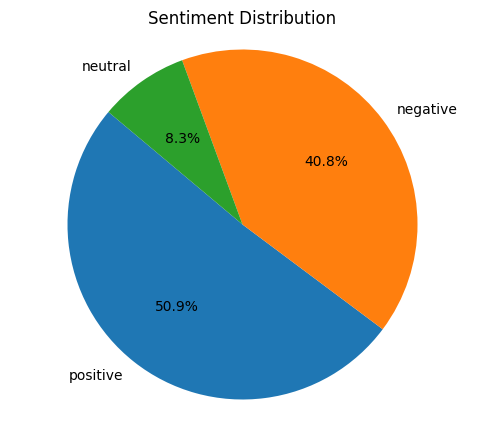

In [23]:
# Plot the value counts as a pie chart
plt.figure(figsize=(6, 5))
plt.pie(sent_count, labels=sent_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
# Group by sentiment and score
ww_df.groupby(['sentiment', 'score'])['content'].count()

sentiment  score
negative   1        3072
           2        1224
           3        1426
           4         885
           5         972
neutral    1         252
           2         101
           3         201
           4         243
           5         740
positive   1         154
           2         174
           3         554
           4        1356
           5        7212
Name: content, dtype: int64

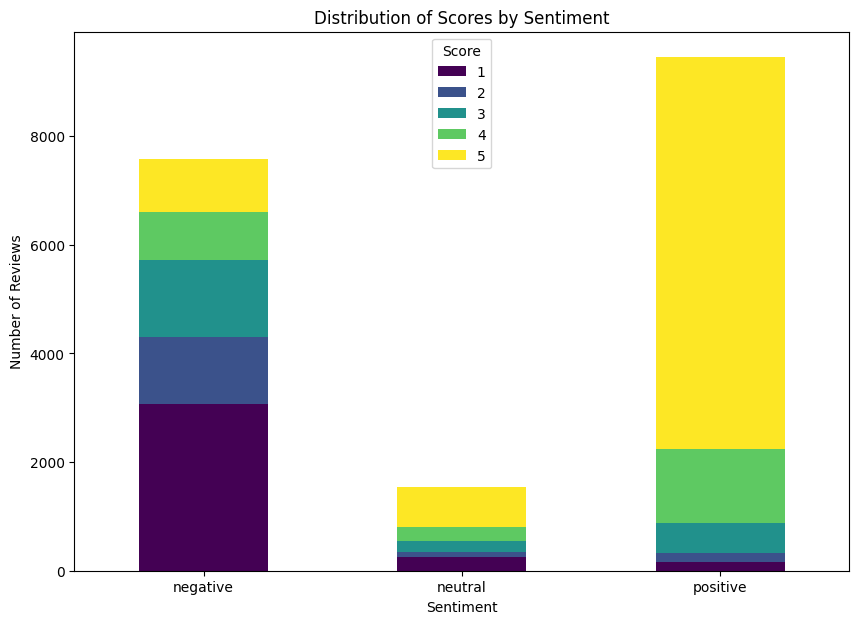

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot the stacked bar chart to visualize the distribution of scores by sentiment
grouped_df = ww_df.groupby(['sentiment', 'score'])['content'].count().unstack().fillna(0)
grouped_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 7))

plt.title('Distribution of Scores by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.legend(title='Score')
plt.xticks(rotation=0)
plt.show()

In [26]:
# Randomly sample 5 negative reviews with score 5
negative_score_5 = ww_df[(ww_df['sentiment'] == 'negative') & (ww_df['score'] == 5)]
random_5_negative_score_5 = negative_score_5.sample(n=5, random_state=1)  # random_state for reproducibility
print(random_5_negative_score_5['content'].values)

['Why is it that when I record the screen, the game sound disappears?'
 'better than genshim?? nah not really they are 2 different games but rn the game is really buggy/laggy and im still waiting for better optimization, but as of right now its really fun'
 "Downloaded to my phone today just to tell me I can't play until the 23rd."
 'Great game. Dont listen to the people who cant play it. They are not reviewing the game, they are letting you know their phone is trash.'
 'Please fix the interface recording']


If we look up the example above, which are 5 stars reviews that the programs indicated to have a negative sentiments, we can actually see that the content or the reviews are actually have negative connotations. 

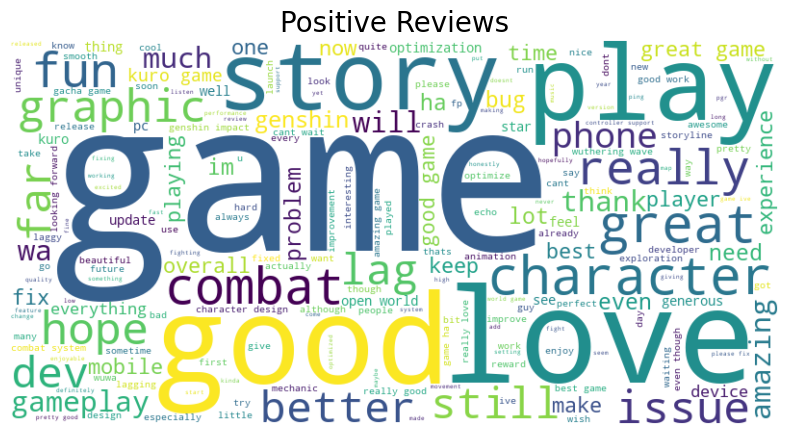

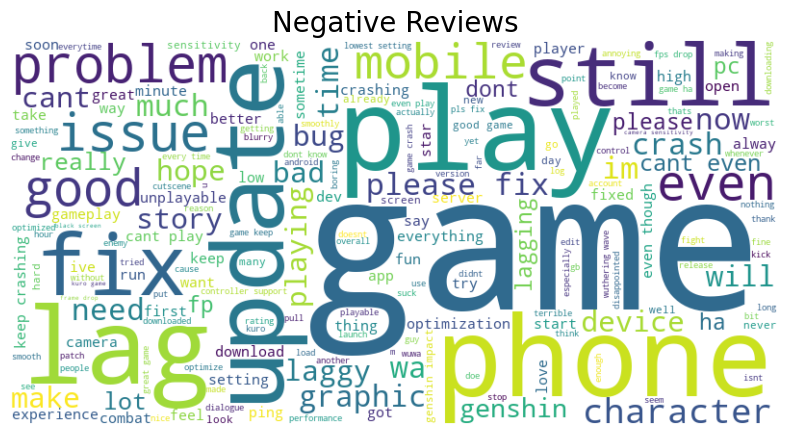

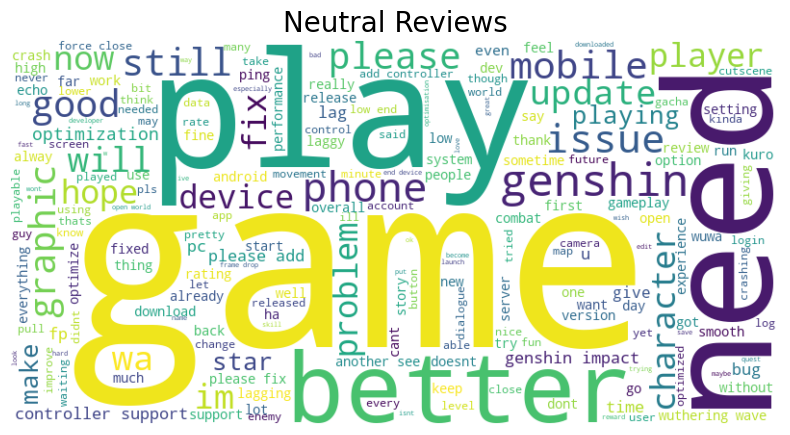

In [27]:
# Exploring the word cloud for positive, negative and neutral reviews
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(data, title):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(title, fontsize=20)
  plt.axis('off')
  plt.show()

positive_reviews = ww_df[ww_df['sentiment'] == 'positive']['cleaned_review']
negative_reviews = ww_df[ww_df['sentiment'] == 'negative']['cleaned_review']
neutral_reviews = ww_df[ww_df['sentiment'] == 'neutral']['cleaned_review']

generate_wordcloud(positive_reviews, 'Positive Reviews')
generate_wordcloud(negative_reviews, 'Negative Reviews')
generate_wordcloud(neutral_reviews, 'Neutral Reviews')

# **Feature Extraction**

In [28]:
sent_count = ww_df['sentiment'].value_counts()
sent_count

sentiment
positive    9450
negative    7579
neutral     1537
Name: count, dtype: int64

In [29]:
from sklearn.utils import resample

# Separate the classes
positive_reviews = ww_df[ww_df.sentiment == 'positive']
negative_reviews = ww_df[ww_df.sentiment == 'negative']
neutral_reviews = ww_df[ww_df.sentiment == 'neutral']

# Determine the target size (mean size of positive and negative classes)
target_size = int((len(positive_reviews) + len(negative_reviews)) / 2)

# Upsample neutral reviews to match the target size
neutral_upsampled = resample(
  neutral_reviews, 
  replace=True,     # sample with replacement
  n_samples=target_size, # target size
  random_state=42
)

# Combine all classes to form the balanced dataset
ww_df_balanced = pd.concat([positive_reviews, negative_reviews, neutral_upsampled])

# Shuffle the dataset
ww_df_balanced = ww_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution
print(ww_df_balanced['sentiment'].value_counts())

sentiment
positive    9450
neutral     8514
negative    7579
Name: count, dtype: int64


In [30]:
print(ww_df_balanced.duplicated().sum()) 

6982


In [31]:
ww_df_balanced

reviewId                     userName  \
0      98bdf25e-b382-4fd0-8f6d-b44beffbb6f0                         Kima   
1      97f53df6-8f6e-4b54-98e0-5a8eb1044549                  vimal jothi   
2      d192f843-76f6-411f-972b-e83571f94e16                     Bored Tv   
3      52ee10fb-3763-4de2-bdbf-8aa849f3980e                          Izz   
4      6ae312a5-728b-411d-a082-979734a27ad5                     Gab Olay   
...                                     ...                          ...   
25538  46a50e31-8af1-40cf-9583-68fb8d1de7c3               John Rey Obien   
25539  707b0cf9-24e6-491d-89dd-077096d2f141                  Gareth Ward   
25540  602bb2fe-83ad-4c9d-a67b-a9cff384aecd                          Cai   
25541  0969ae09-2fb4-44bd-9154-bfd1fd4c818d                   Laila Rudy   
25542  1808b735-2d0b-4b9e-aa53-44bd03269a5d  shinthanthtet shinthanthtet   

                                                 content  score  \
0                                    Genshin could never      5   
1      add lingyang to more buff now he is one more u...      5   
2      already pre installed can't wait to play this ...      2   
3      This game is just phenomenal. People say there...      5   
4                        It's almost like Genshin Impact      5   
...                                                  ...    ...   
25538                                 can beat genshin..      5   
25539  Really good and very promising. The controls f...      3   
25540  Amazing game, from the combat to the scenery, ...      4   
25541     Animation MC don't work!!! Can't play. Damnnnn      1   
25542                            Just play you will know      5   

       thumbsUpCount reviewCreatedVersion                   at appVersion  \
0                  0                1.0.0  2024-05-25 09:02:08      1.0.0   
1                  0                1.0.0  2024-06-11 08:13:26      1.0.0   
2                  3                1.1.0  2024-07-02 18:17:00      1.1.0   
3                  1                1.0.0  2024-05-25 15:18:59      1.0.0   
4                  0                1.0.0  2024-05-28 14:14:17      1.0.0   
...              ...                  ...                  ...        ...   
25538              0                1.0.0  2024-06-13 22:16:01      1.0.0   
25539             22                1.0.0  2024-05-27 10:04:58      1.0.0   
25540              1                1.1.0  2024-07-05 21:47:44      1.1.0   
25541              1                1.0.0  2024-05-24 00:03:59      1.0.0   
25542              0                1.0.0  2024-05-28 20:14:54      1.0.0   

                                          cleaned_review sentiment  
0                                    genshin could never  negative  
1      add lingyang to more buff now he is one more u...   neutral  
2      already pre installed cant wait to play this a...  positive  
3      this game is just phenomenal people say there ...  positive  
4                          it almost like genshin impact   neutral  
...                                                  ...       ...  
25538                                   can beat genshin   neutral  
25539  really good and very promising the control for...  positive  
25540  amazing game from the combat to the scenery an...  positive  
25541           animation mc dont work cant play damnnnn  negative  
25542                            just play you will know   neutral  

[25543 rows x 10 columns]

In [32]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Separate the features and target variable
X = ww_df_balanced['cleaned_review']
y = ww_df_balanced['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, 
    y, 
    test_size=0.25, 
    stratify=y,
    shuffle=True, 
    random_state=42)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(smooth_idf=False, norm=None, ngram_range=(1, 2), max_df=0.8, min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# **Modeling**

## **Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, max_iter=10000, solver='newton-cg', penalty='l2')
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.1, max_iter=10000, solver='newton-cg')

In [35]:
logreg_ypred_train = logreg.predict(X_train_tfidf)
logreg_ypred_test = logreg.predict(X_test_tfidf)

accuracy_train = accuracy_score(logreg_ypred_train, y_train)
accuracy_test = accuracy_score(logreg_ypred_test, y_test)

print('-- LOGISTIC REGRESSION --')
print('Train Accuracy:', accuracy_train)
print('Test Accuracy', accuracy_test)

print('\n-> Classification Report (Test Set)')
print(classification_report(y_test, logreg_ypred_test))

print('\n-> Classification Report (Train Set):')
print(classification_report(y_train, logreg_ypred_train))

-- LOGISTIC REGRESSION --
Train Accuracy: 0.9993735971185468
Test Accuracy 0.9044785468211713

-> Classification Report (Test Set)
              precision    recall  f1-score   support

    negative       0.89      0.83      0.86      1895
     neutral       0.91      0.99      0.95      2128
    positive       0.91      0.89      0.90      2363

    accuracy                           0.90      6386
   macro avg       0.90      0.90      0.90      6386
weighted avg       0.90      0.90      0.90      6386


-> Classification Report (Train Set):
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      5684
     neutral       1.00      1.00      1.00      6386
    positive       1.00      1.00      1.00      7087

    accuracy                           1.00     19157
   macro avg       1.00      1.00      1.00     19157
weighted avg       1.00      1.00      1.00     19157



## **SVM**

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# After performing grid search, I found that the hyperparameters below give the best results
svm_classifier = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(C=10, random_state=42)

In [37]:
svm_ypred_train = svm_classifier.predict(X_train_tfidf)
svm_ypred_test = svm_classifier.predict(X_test_tfidf)

acc_train_svm = accuracy_score(svm_ypred_train, y_train)
acc_test_svm = accuracy_score(svm_ypred_test, y_test)

print("-- SUPPORT VECTOR MACHINE --")
print('Train Accuracy:', acc_train_svm)
print('Test Accuracy', acc_test_svm)

print('\nClassification Report (Test Set):')
print(classification_report(y_test, svm_ypred_test))

print('\nClassification Report (Train Set):')
print(classification_report(y_train, svm_ypred_train))

-- SUPPORT VECTOR MACHINE --
Train Accuracy: 0.9981207913556402
Test Accuracy 0.9105856561227685

Classification Report (Test Set):
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      1895
     neutral       0.95      0.99      0.97      2128
    positive       0.91      0.88      0.90      2363

    accuracy                           0.91      6386
   macro avg       0.91      0.91      0.91      6386
weighted avg       0.91      0.91      0.91      6386


Classification Report (Train Set):
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      5684
     neutral       1.00      1.00      1.00      6386
    positive       1.00      1.00      1.00      7087

    accuracy                           1.00     19157
   macro avg       1.00      1.00      1.00     19157
weighted avg       1.00      1.00      1.00     19157



## **LSTM**

In [38]:
from tensorflow.python.keras.layers import Dense
from keras.api.preprocessing.sequence import pad_sequences
from keras.api.models import Sequential
from keras.api.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.api.utils import to_categorical
from keras.api.callbacks import EarlyStopping

In [39]:
# Convert sparse matrices to dense arrays
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Reshape the dense arrays to have a 3D shape
X_train_reshaped = X_train_tfidf_dense.reshape((X_train_tfidf_dense.shape[0], 1, X_train_tfidf_dense.shape[1]))
X_test_reshaped = X_test_tfidf_dense.reshape((X_test_tfidf_dense.shape[0], 1, X_test_tfidf_dense.shape[1]))

# Convert sentiment labels to categorical format
y_train_dummies = pd.get_dummies(y_train).values
y_test_dummies = pd.get_dummies(y_test).values

In [40]:
class EarlyStopping(keras.callbacks.Callback):
    def __init__(self,
                 threshold,
                 patience=3,
                 restore_best_weights='True'):
        super(EarlyStopping, self).__init__()
        self.threshold = threshold

    # Applying early callback
    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [41]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train_reshaped.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Define early stopping callback
mycallback = EarlyStopping(threshold=0.90)

c:\Users\User\anaconda3\envs\ml-test\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │    12,196,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,219,651 (46.61 MB)

 Trainable params: 12,219,651 (46.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
# Train the model
history = model.fit(X_train_reshaped, y_train_dummies, epochs=25, batch_size=32, validation_split=0.15, callbacks=[mycallback])

Epoch 1/25
509/509 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.6966 - loss: 0.6889 - val_accuracy: 0.9012 - val_loss: 0.2672


In [43]:
train_acc = model.evaluate(X_train_reshaped, y_train_dummies, verbose=0)[1]
test_acc = model.evaluate(X_test_reshaped, y_test_dummies, verbose=0)[1]

print('-- LSTM --')
print(f'Train Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')

print('\n-> Classification Report (Test Set)')
y_pred = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_dummies, axis=1)
print(classification_report(y_test, y_pred))

print('\n-> Classification Report (Train Set)')
y_pred_train = model.predict(X_train_reshaped)
y_pred_train = np.argmax(y_pred_train, axis=1)
y_train = np.argmax(y_train_dummies, axis=1)
print(classification_report(y_train, y_pred_train))

-- LSTM --
Train Accuracy: 0.9648170471191406
Test Accuracy: 0.8972752690315247

-> Classification Report (Test Set)
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1895
           1       0.96      0.95      0.96      2128
           2       0.91      0.85      0.88      2363

    accuracy                           0.90      6386
   macro avg       0.90      0.90      0.90      6386
weighted avg       0.90      0.90      0.90      6386


-> Classification Report (Train Set)
599/599 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5684
           1       0.99      0.98      0.98      6386
           2       0.98      0.95      0.96      7087

    accuracy                           0.96     19157
   macro avg       0.96      0.97      0.96     19157
weighted avg       0.97      0.96      0.96     19157


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_and_predict(texts, model, vectorizer):
    X_tfidf = vectorizer.transform(texts)
    X_dense = X_tfidf.toarray()
    X_reshaped = X_dense.reshape((X_dense.shape[0], 1, X_dense.shape[1]))
    predictions = model.predict(X_reshaped)
    predicted_classes = np.argmax(predictions, axis=1)
    return predicted_classes

# Example input texts
texts = ["I love this game, it's so fun!",
         "I hate this game, it's so boring.",
         "The game is okay, nothing special."]

# Predict sentiments
predicted_classes = preprocess_and_predict(texts, model, tfidf)

# According to the roberta huggingface documentation
class_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

for text, pred in zip(texts, predicted_classes):
    print(f"Text: '{text}' -> Predicted sentiment: {class_labels[pred]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Text: 'I love this game, it's so fun!' -> Predicted sentiment: Positive
Text: 'I hate this game, it's so boring.' -> Predicted sentiment: Negative
Text: 'The game is okay, nothing special.' -> Predicted sentiment: Neutral


# **Project Analysis**

This project involves sentiment analysis of reviews for the Wuthering Waves game app using web scraping from the Google Play Store. After scraping, the data was cleaned by removing duplicates and rows containing NaN values. Subsequently, text preprocessing was conducted, which included removing emojis, symbols, user mentions, and other irrelevant elements. The cleaned reviews were stored in a new column named cleaned_review.

For sentiment analysis, a pre-trained Roberta model from Hugging Face was employed to classify the sentiment of each review into positive, negative, or neutral categories. The sentiment category for each review was recorded in a new column named sentiment. It was observed that the distribution of sentiments was uneven, with a predominance of positive and negative sentiments compared to neutral ones, which could lead to bias and overfitting. To address this issue, oversampling was performed to balance the sentiment categories, ensuring that critical information was retained, which could be compromised by underfitting.

Three models were implemented in this project: Logistic Regression, SVM, and LSTM. All three models achieved test accuracies close to 90%, which is considered excellent. However, the training accuracies approached 100%. The project's criterion for a top rating is achieving both training and test accuracies of at least 92%. Despite implementing various methods to improve accuracy—such as SMOTE, CNN, grid search, hyperparameter tuning, oversampling, undersampling, and additional text processing—reaching an accuracy beyond 90% has proven really challenging. Therefore, the project will be submitted with a test accuracy of 90%.

